# Election Data analysis - Polls and Donors

In this project, we analyzed two datasets. The first data set will be the results of political polls for the 2016 general elections.

Some of the questions answered are:

1.) Who was being polled and what was their party affiliation?
2.) Did the poll results favor Trump or Clinton?
3.) How do undecided voters effect the poll?
4.) Can we account for the undecided voters?
5.) How did voter sentiment change over time?
6.) Can we see an effect in the polls from the debates?

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
from __future__ import division

In [7]:
import requests

In [8]:
from StringIO import StringIO 

In [9]:
url = 'https://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv'

source = requests.get(url).text

poll_data = StringIO(source)

In [10]:
poll_df = pd.read_csv(poll_data)

In [11]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 202.2+ KB


In [12]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


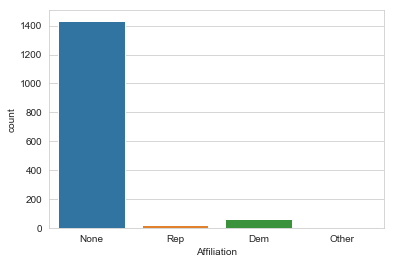

In [15]:
sns.countplot('Affiliation',data=poll_df)

Overall it's mostly neutral, but is leaning towards Democratic affliation. 

By sorting it by population, we get the following results.

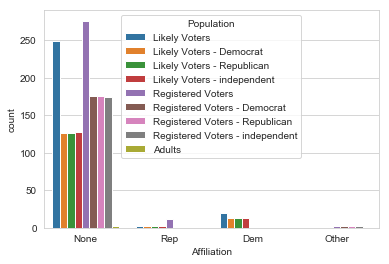

In [16]:
sns.countplot('Affiliation',data=poll_df,hue='Population')

In [17]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


In [20]:
avg = pd.DataFrame(poll_df.mean()) 

avg.drop('Number of Observations',axis=0,inplace=True)

In [21]:
avg.head()

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068
Question Iteration,1.216820


In [22]:
std = pd.DataFrame(poll_df.std())

std.drop('Number of Observations',axis=0,inplace=True)

In [23]:
std.head()

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118
Question Iteration,0.412214


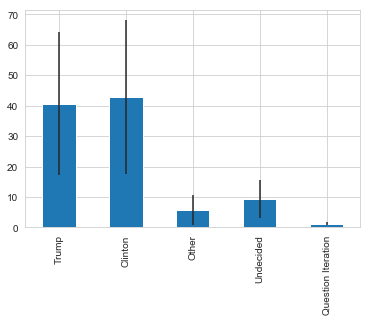

In [24]:
avg.plot(yerr=std,kind='bar',legend=False)

The polls seem to be very close, especially considering the undecided votes.

In [25]:
poll_avg = pd.concat([avg,std],axis=1)

In [27]:
poll_avg.columns = ['Average','STD']

In [28]:
poll_avg

,Average,STD
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118
Question Iteration,1.216820,0.412214


In [29]:
poll_df.head(5)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


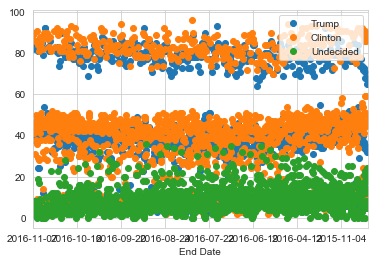

In [30]:
poll_df.plot(x='End Date',y=['Trump','Clinton','Undecided'],marker='o',linestyle='')

In [31]:
from datetime import datetime

In [32]:
poll_df['Difference'] = (poll_df.Trump - poll_df.Clinton)/100

poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,0.02


In [33]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,-0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,-0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,-0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,-0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,-0.1425


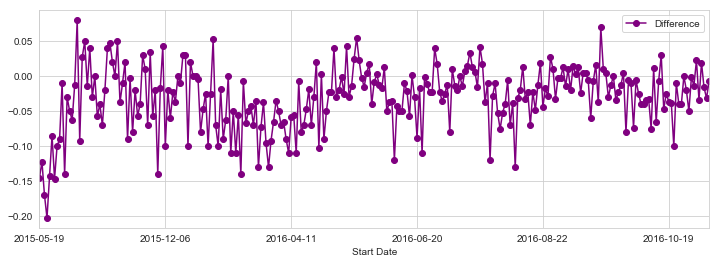

In [34]:
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

In [36]:
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2016-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print min(xlimit)
print max(xlimit)

232
262


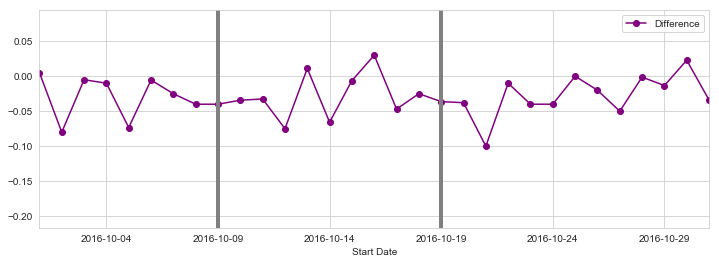

In [44]:
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(232,262))

plt.axvline(232+8, linewidth=4, color='grey')
plt.axvline(232+18, linewidth=4, color='grey')

There isn't any immediate dip in the differnce after the debates which means both candistes did pretty good in the debate. 

# Donar Data Set

Now, the further data anaylsed is from the donor data set from 2012 general elections.

The questions we will be trying to answer while looking at this Data Set is:

1.) How much was donated and what was the average donation?
2.) How did the donations differ between candidates?
3.) How did the donations differ between Democrats and Republicans?
4.) What were the demographics of the donors?
5.) Is there a pattern to donation amounts?

In [70]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

In [71]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [72]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [66]:
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [53]:
don_mean = donor_df['contb_receipt_amt'].mean()

don_std = donor_df['contb_receipt_amt'].std()

print 'The average donation was %.2f with a std of %.2f' %(don_mean,don_std)

The average donation was 298.24 with a std of 3749.67


In [55]:
top_donor = donor_df['contb_receipt_amt'].copy()

top_donor.sort_values (ascending=True, inplace=True)

top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [67]:
top_donor = top_donor[top_donor >0]

top_donor.sort_values (ascending=True, inplace=True)

top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

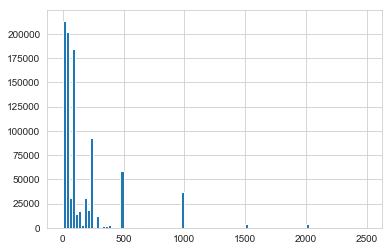

In [68]:
com_don = top_donor[top_donor < 2500]

com_don.hist(bins=100)

In [69]:
candidates = donor_df.cand_nm.unique()
#Show
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [73]:
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [74]:
'''
for i in xrange(0,len(donor_df)):
    if donor_df['cand_nm'][i] == 'Obama,Barack':
        donor_df['Party'][i] = 'Democrat'
    else:
        donor_df['Party'][i] = 'Republican'
'''

"\nfor i in xrange(0,len(donor_df)):\n    if donor_df['cand_nm'][i] == 'Obama,Barack':\n        donor_df['Party'][i] = 'Democrat'\n    else:\n        donor_df['Party'][i] = 'Republican'\n"

In [75]:
# Clear refunds
donor_df = donor_df[donor_df.contb_receipt_amt >0]

# Preview DataFrame
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [76]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [77]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [78]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

# Our index tracker
i = 0

for don in cand_amount:
    print " The candidate %s raised %.0f dollars " %(cand_amount.index[i],don)
    print '\n'
    i += 1

 The candidate Bachmann, Michelle raised 2711439 dollars 


 The candidate Cain, Herman raised 7101082 dollars 


 The candidate Gingrich, Newt raised 12832770 dollars 


 The candidate Huntsman, Jon raised 3330373 dollars 


 The candidate Johnson, Gary Earl raised 566962 dollars 


 The candidate McCotter, Thaddeus G raised 39030 dollars 


 The candidate Obama, Barack raised 135877427 dollars 


 The candidate Paul, Ron raised 21009620 dollars 


 The candidate Pawlenty, Timothy raised 6004819 dollars 


 The candidate Perry, Rick raised 20305754 dollars 


 The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars 


 The candidate Romney, Mitt raised 88335908 dollars 


 The candidate Santorum, Rick raised 11043159 dollars 




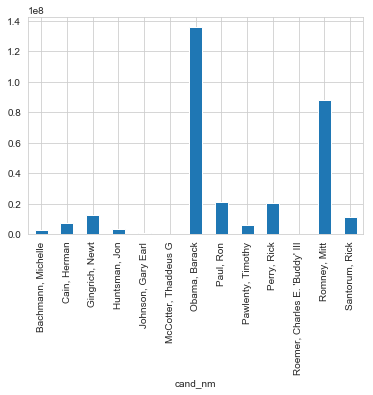

In [79]:
cand_amount.plot(kind='bar')

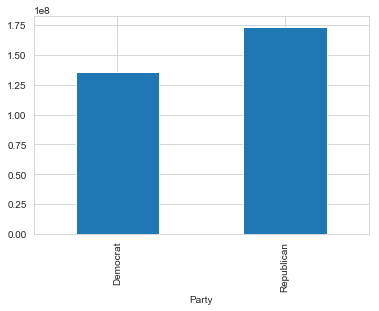

In [80]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [81]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')

In [82]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [83]:
occupation_df.shape

(45067, 2)

In [84]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [85]:
occupation_df.shape

(31, 2)

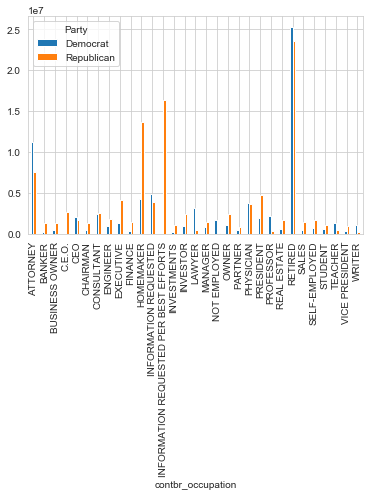

In [86]:
occupation_df.plot(kind='bar')

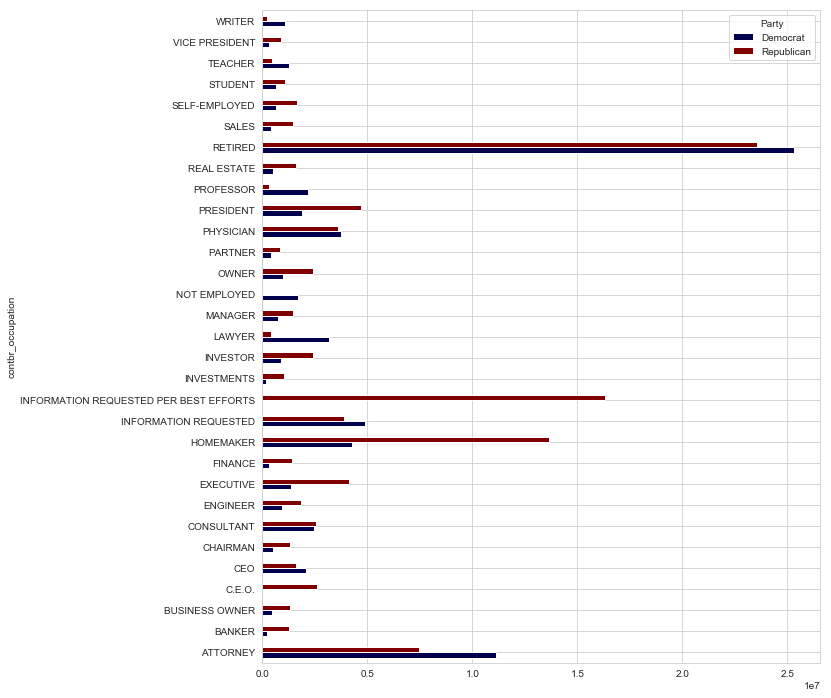

In [87]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')

In [88]:
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [89]:
# Set new ceo row as sum of the current two
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
# Drop CEO
occupation_df.drop('C.E.O.',inplace=True)

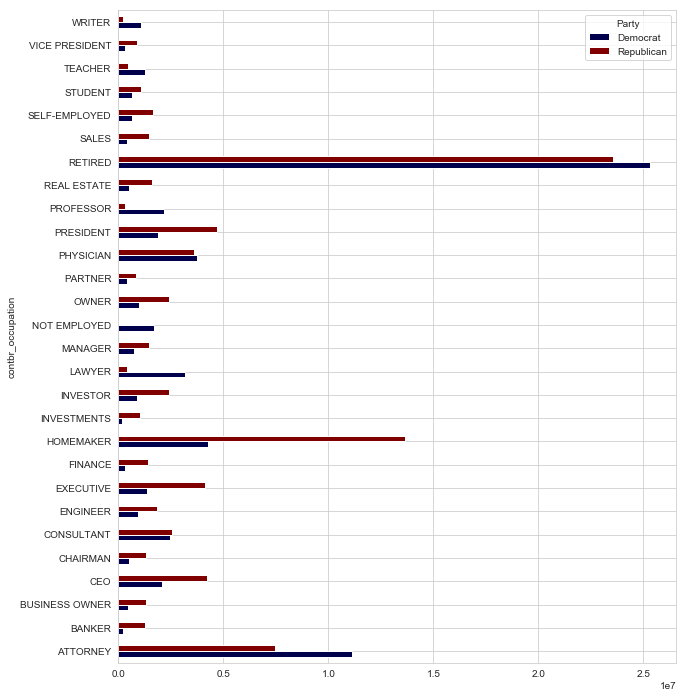

In [90]:
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')